In [9]:
import numpy as np
import re
import seaborn as sns
import pandas as pd
import nltk
import sklearn
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stop_words = factory.get_stop_words()
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

def cleansing_text(text):
        #casefolding
        text = text.lower()
        #remove whitespaces
        text = text.strip()
        #remove line-break characters
        text = text.replace("\\n"," ")
        #tokenization
        tokens = text.split()

        #clean non alphabet character
        tokens = [re.sub(r'[^A-Za-z]','',token) for token in tokens]

        #remove stopwords
        tokens = [token for token in tokens if token not in stop_words]
        #remove token with less than or equal with 3 character length
        tokens = [token for token in tokens if len(token)>3]
        #stemming
        tokens = [stemmer.stem(token) for token in tokens]

        sentence = " ".join(tokens)
        return sentence

In [7]:
df = pd.read_csv('output/translated_cleaned.csv')
df

,full_text,username,created_at,cleaned,case_fold,token,stop,stemmed,second_cleaned,translated
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,inilah unit rumah tapak jabatan menteri yang ...,"['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['ini', 'unit', 'rumah', 'tapak', 'jabat', 'me...",ini unit rumah tapak jabat menteri rampung ikn...,BNIs unit of landed house for ministers office...
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,Alhamdulillah terima kasih berkenan mengunjung...,alhamdulillah terima kasih berkenan mengunjung...,"['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'kenan', ...",alhamdulillah terima kasih kenan unjung kantor...,Thank God
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,pengamat kritik proyek milik konglomerat pend...,"['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['amat', 'kritik', 'proyek', 'milik', 'konglom...",amat kritik proyek milik konglomerat dukung ik...,bvery critical of conglomerate projects suppor...
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,Wow‼️Terlihat dari pinggir jalan Gedunggedung ...,wow‼️terlihat dari pinggir jalan gedunggedung ...,"['wow‼️terlihat', 'dari', 'pinggir', 'jalan', ...","['wow‼️terlihat', 'pinggir', 'jalan', 'gedungg...","['wow lihat', 'pinggir', 'jalan', 'gedunggedun...",wow lihat pinggir jalan gedunggedung julang ti...,bwow
4,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,Waktu ngedrone roll off trafo PLN di pelabuhan...,waktu ngedrone roll off trafo pln di pelabuhan...,"['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...",waktu ngedrone roll off trafo pln labuh ikn ka...,bwhen the drone rolls off the PLN transformer ...
...,...,...,...,...,...,...,...,...,...,...
2313,Otoritas IKN Kebut 220 LOI Investasi Swasta Mu...,consulting_sf,Wed May 24 06:08:13 +0000 2023,Otoritas IKN Kebut 220 LOI Investasi Swasta Mu...,otoritas ikn kebut loi investasi swasta mulai...,"['otoritas', 'ikn', 'kebut', 'loi', 'investasi...","['otoritas', 'ikn', 'kebut', 'loi', 'investasi...","['otoritas', 'ikn', 'kebut', 'loi', 'investasi...",otoritas ikn kebut loi investasi swasta mulai ...,BIKN authorities speed up private investment l...
2314,Indonesia Kantongi 29 Komitmen Investasi IKN D...,consulting_sf,Tue May 23 05:34:26 +0000 2023,Indonesia Kantongi 29 Komitmen Investasi IKN D...,indonesia kantongi komitmen investasi ikn dar...,"['indonesia', 'kantongi', 'komitmen', 'investa...","['indonesia', 'kantongi', 'komitmen', 'investa...","['indonesia', 'kantong', 'komitmen', 'investas...",indonesia kantong komitmen investasi ikn jepan...,BIndonesia bags Japans IKN investment commitme...
2315,Pemerintah mengaku telah mempersiapkan fasilit...,DDTCNews,Mon May 22 04:57:27 +0000 2023,Pemerintah mengaku telah mempersiapkan fasilit...,pemerintah mengaku telah mempersiapkan fasilit...,"['pemerintah', 'mengaku', 'telah', 'mempersiap...","['pemerintah', 'mengaku', 'mempersiapkan', 'fa...","['perintah', 'aku', 'siap', 'fasilitas', 'paja...",perintah aku siap fasilitas paja sifat seluruh...,border
2316,"Hari Terakhir, Cara Vote Logo IKN Nusantara, K...",tribunkaltim,Sat May 20 10:25:49 +0000 2023,Hari Terakhir Cara Vote Logo IKN Nusantara Kes...,hari terakhir cara vote logo ikn nusantara kes...,"['hari', 'terakhir', 'cara', 'vote', 'logo', '...","['hari', 'terakhir', 'cara', 'vote', 'logo', '...","['hari', 'akhir', 'cara', 'vote', 'logo', 'ikn...",hari akhir cara vote l

In [10]:
df['cleansed'] = df['translated'].apply(cleansing_text)
df

,full_text,username,created_at,cleaned,case_fold,token,stop,stemmed,second_cleaned,translated,cleansed
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Fri Mar 29 11:48:49 +0000 2024,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,inilah unit rumah tapak jabatan menteri yang ...,"['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['inilah', 'unit', 'rumah', 'tapak', 'jabatan'...","['ini', 'unit', 'rumah', 'tapak', 'jabat', 'me...",ini unit rumah tapak jabat menteri rampung ikn...,BNIs unit of landed house for ministers office...,bnis unit landed house ministers office been c...
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Fri Mar 29 02:34:41 +0000 2024,Alhamdulillah terima kasih berkenan mengunjung...,alhamdulillah terima kasih berkenan mengunjung...,"['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'berkenan...","['alhamdulillah', 'terima', 'kasih', 'kenan', ...",alhamdulillah terima kasih kenan unjung kantor...,Thank God,thank
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Thu Mar 28 23:39:00 +0000 2024,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,pengamat kritik proyek milik konglomerat pend...,"['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['pengamat', 'kritik', 'proyek', 'milik', 'kon...","['amat', 'kritik', 'proyek', 'milik', 'konglom...",amat kritik proyek milik konglomerat dukung ik...,bvery critical of conglomerate projects suppor...,bvery critical conglomerate projects supportin...
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Thu Mar 28 06:04:01 +0000 2024,Wow‼️Terlihat dari pinggir jalan Gedunggedung ...,wow‼️terlihat dari pinggir jalan gedunggedung ...,"['wow‼️terlihat', 'dari', 'pinggir', 'jalan', ...","['wow‼️terlihat', 'pinggir', 'jalan', 'gedungg...","['wow lihat', 'pinggir', 'jalan', 'gedunggedun...",wow lihat pinggir jalan gedunggedung julang ti...,bwow,bwow
4,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Thu Mar 28 03:03:32 +0000 2024,Waktu ngedrone roll off trafo PLN di pelabuhan...,waktu ngedrone roll off trafo pln di pelabuhan...,"['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...","['waktu', 'ngedrone', 'roll', 'off', 'trafo', ...",waktu ngedrone roll off trafo pln labuh ikn ka...,bwhen the drone rolls off the PLN transformer ...,bwhen drone rolls transformer anchored east ka...
...,...,...,...,...,...,...,...,...,...,...,...
2313,Otoritas IKN Kebut 220 LOI Investasi Swasta Mu...,consulting_sf,Wed May 24 06:08:13 +0000 2023,Otoritas IKN Kebut 220 LOI Investasi Swasta Mu...,otoritas ikn kebut loi investasi swasta mulai...,"['otoritas', 'ikn', 'kebut', 'loi', 'investasi...","['otoritas', 'ikn', 'kebut', 'loi', 'investasi...","['otoritas', 'ikn', 'kebut', 'loi', 'investasi...",otoritas ikn kebut loi investasi swasta mulai ...,BIKN authorities speed up private investment l...,bikn authorities speed private investment star...
2314,Indonesia Kantongi 29 Komitmen Investasi IKN D...,consulting_sf,Tue May 23 05:34:26 +0000 2023,Indonesia Kantongi 29 Komitmen Investasi IKN D...,indonesia kantongi komitmen investasi ikn dar...,"['indonesia', 'kantongi', 'komitmen', 'investa...","['indonesia', 'kantongi', 'komitmen', 'investa...","['indonesia', 'kantong', 'komitmen', 'investas...",indonesia kantong komitmen investasi ikn jepan...,BIndonesia bags Japans IKN investment commitme...,bindonesia bags japans investment commitment c...
2315,Pemerintah mengaku telah mempersiapkan fasilit...,DDTCNews,Mon May 22 04:57:27 +0000 2023,Pemerintah mengaku telah mempersiapkan fasilit...,pemerintah mengaku telah mempersiapkan fasilit...,"['pemerintah', 'mengaku', 'telah', 'mempersiap...","['pemerintah', 'mengaku', 'mempersiapkan', 'fa...","['perintah', 'aku', 'siap', 'fasilitas', 'paja...",perintah aku siap fasilitas paja sifat seluruh...,border,border
2316,"Hari Terakhir, Cara Vote Logo IKN Nusantara, K...",tribunkaltim,Sat May 20 10:25:49 +0000 20

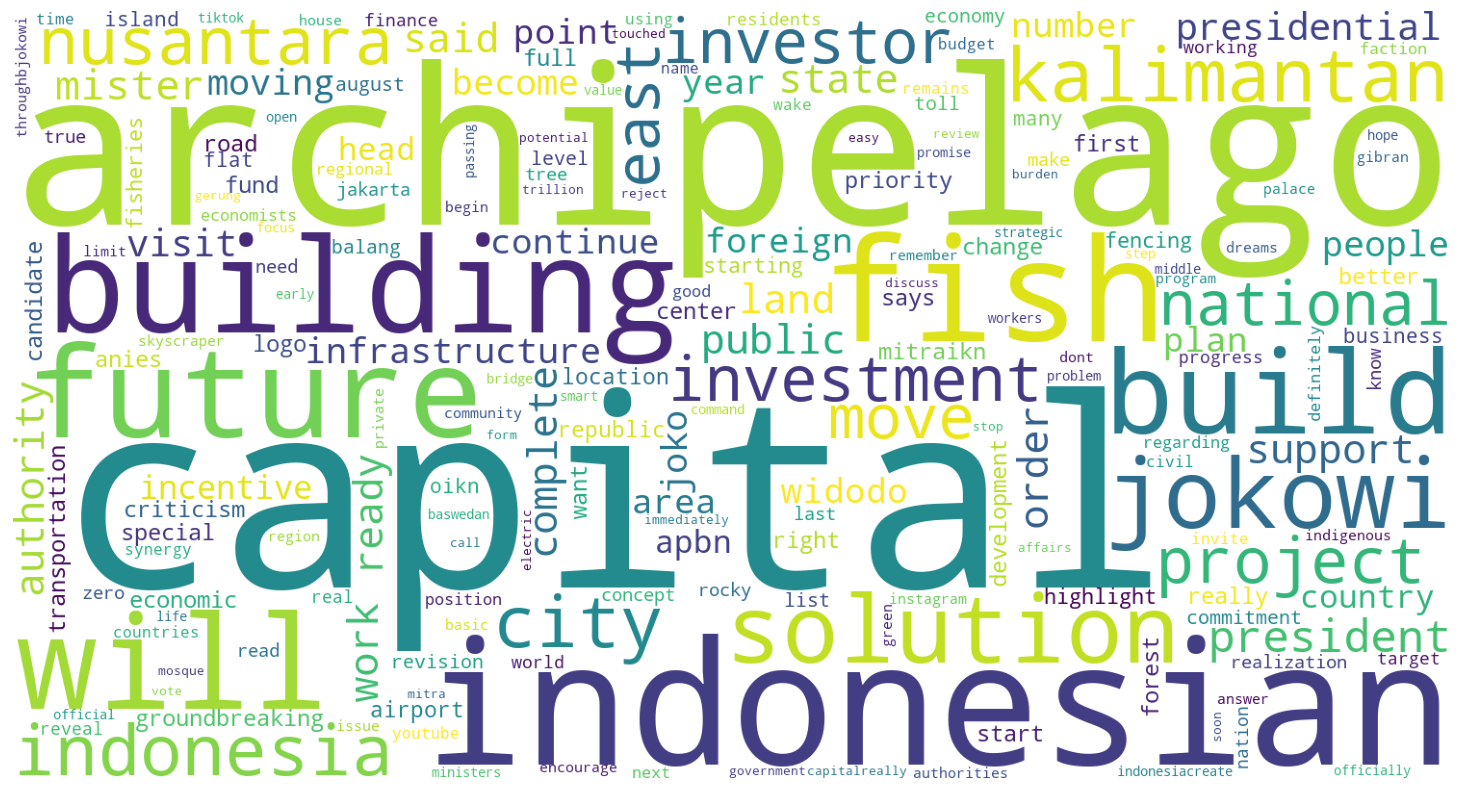

In [12]:
text = "".join(df['cleansed'].tolist())
wcloud = WordCloud(width = 1500, height = 800, background_color='white', collocations=False).generate(text)
plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wcloud)
plt.axis("off")
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
featured_df2 = tfidf.fit_transform(df['cleansed'])
featured_df2 = pd.DataFrame(featured_df2.todense(),
                            columns=tfidf.get_feature_names())

TypeError: 'list' object is not callable